In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.src.layers import Dense, Activation
from keras import Sequential, Input
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [33]:
gender_submission = pd.read_csv('data/gender_submission.csv', sep = ',')
test = pd.read_csv('data/test.csv', sep = ',')
train = pd.read_csv('data/train.csv', sep = ',')

train = pd.get_dummies(train)
test = pd.get_dummies(test)


train_test, train_valid = train_test_split(train, test_size=0.2, random_state=42)

TypeError: 'DataFrame' object is not callable

### Simple Mapping of Attributes 

Attribute mapping of PClass -> Survived yields $\approx 70\%$ accurracy 

In [24]:
pred_survived = train_test.groupby('Pclass')['Survived'].agg(lambda p: p.value_counts().idxmax())
train_valid['Predicted'] = train_valid['Pclass'].map(pred_survived)
accuracy = accuracy_score(train_valid['Survived'], train_valid['Predicted'])
print("Accuracy: ", accuracy)

Accuracy:  0.7039106145251397


In [10]:
features = ['Pclass']
x = train_test[features]
y = train_test["Survived"]

model = LogisticRegression()
model.fit(x, y)
predictions = model.predict(train_valid[features])

accuracy = accuracy_score(train_valid["Survived"], predictions)
print(accuracy)

0.7039106145251397


In [30]:
features = ['Sex_female', 'Sex_male', 'Age']

test.fillna({"Age": train["Age"].median(skipna=True)}, inplace=True)
train.fillna({"Age": train["Age"].median(skipna=True)}, inplace=True)

x = train[features]
y = train["Survived"]

model = LogisticRegression()
model.fit(x, y)
predictions = model.predict(test[features])

accuracy = accuracy_score(gender_submission["Survived"], predictions)
print(accuracy)

1.0


In [12]:
features = ['Sex_female', 'Sex_male', 'Pclass']

test.fillna({"Age": train["Age"].median(skipna=True)}, inplace=True)
train.fillna({"Age": train["Age"].median(skipna=True)}, inplace=True)

x = train[features]
y = train["Survived"]

model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
model.fit(x, y)
predictions = model.predict(test[features])

accuracy = accuracy_score(gender_submission["Survived"], predictions)
print(accuracy)

1.0


# Aufgabe 3: Neuronale Netze

##### Datan Aufbereitung

- Einlesen der CSV Dateien
- Feature definition
- Trainingsdaten generierung
- Datenskalierung
- Ausgabe

In [113]:
# Scaling Data
gender_submission = pd.read_csv('data/gender_submission.csv', sep = ',')
test = pd.read_csv('data/test.csv', sep = ',')
train = pd.read_csv('data/train.csv', sep = ',')

train = pd.get_dummies(train)
test = pd.get_dummies(test)

train.fillna({"Age": train["Age"].median(skipna=True)}, inplace=True)
test.fillna({"Age": train["Age"].median(skipna=True)}, inplace=True)

features = ['Sex_female', 'Sex_male', 'Pclass', 'Age']
x_train = train[features]
y_train = train["Survived"]
x_test = test[features]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [124]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train_split, y_train_split, epochs=40, batch_size=16, validation_data=(x_val_split, y_val_split))

predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int).reshape(-1)

# Genauigkeit berechnen
accuracy = accuracy_score(gender_submission["Survived"], predictions)

if accuracy > 1: # not gonna happen i just want to make sure, that the model is not going to be overwritten
    model.save('titanic_model.keras')
    print("Model saved - titanic_model.keras")

print("Accuracy:", accuracy)

Epoch 1/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6469 - loss: 0.6483 - val_accuracy: 0.5922 - val_loss: 0.6836
Epoch 2/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6232 - loss: 0.6607 - val_accuracy: 0.5922 - val_loss: 0.6780
Epoch 3/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6345 - loss: 0.6484 - val_accuracy: 0.5922 - val_loss: 0.6746
Epoch 4/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6165 - loss: 0.6573 - val_accuracy: 0.5922 - val_loss: 0.6704
Epoch 5/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5959 - loss: 0.6677 - val_accuracy: 0.5922 - val_loss: 0.6666
Epoch 6/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6286 - loss: 0.6472 - val_accuracy: 0.5922 - val_loss: 0.6636
Epoch 7/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.6515 - loss: 0.6284 - val_accuracy: 0.5922 - val_loss: 0.6602
Epoch 8/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.6121 - loss: 0.6473 - val_accuracy: 0.5922 - val_l

### Plotten

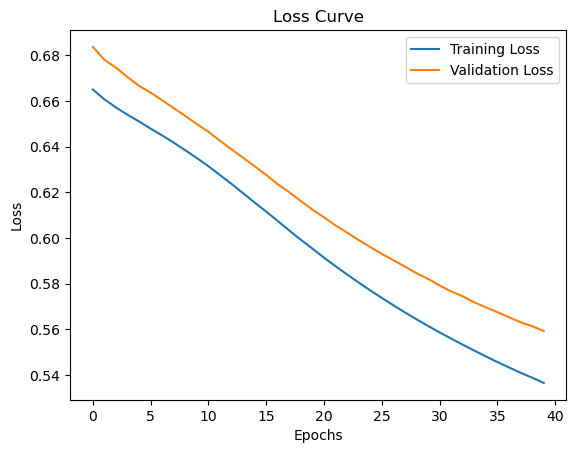

In [125]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()